# Lexcical characteristics of novel «Живи и помни»

In Natural Language Processing, text analysis is usually the first step, which can help us to know some features of the text.This work studies the lexical characteristics of a Russian novel named «Живи и помни»．

I dowwloaded the text file of this novel before.

Firstly, we should read the file to get the text of the novel.

In [10]:
import re

In [11]:
from pymystem3 import Mystem
import pymorphy2

In [12]:
m = Mystem()

In [13]:
f= open(r'zhivi-i-pomni-5.txt','r',encoding='utf-8')

In [14]:
content=''.join(f.readlines())

In [15]:
print(content)

Имя Валентина Григорьевича Распутина известно всему миру, его книги переведены на десятки иностранных языков. Трагизм и горькая правда его произведений поразили читателей недаром его повести и рассказы экранизированы и поставлены на многих театральных сценах. Произведения Валентина Распутина глубоко психологичны, автор исследует вечные темы добра, справедливости, долга, в каждом поступке его героев раскрывается их человеческая сущность. Зима на сорок пятый, последний военный год в этих краях, простояла сиротской, но крещенские морозы свое взяли, отстучали, как им полагается, за сорок. Прокалившись за неделю, отстал с деревьев куржак, и лес совсем помертвел, снег по земле заскрип и покрошился, в жестком и ломком воздухе по утрам было трудно продохнуть. Потом снова отпустило, после этого отпустило еще раз, и на открытых местах рано затвердел наст. В морозы в бане Гуськовых, стоящей на нижнем огороде у Ангары, поближе к воде, случилась пропажа: исчез хороший, старой работы, плотницкий топ

In [16]:
import polyglot
from polyglot.text import Text, Word

In [17]:
text = Text(content)

We can detect the language in this novel.

In [18]:
print("Language Detected: Code={}, Name={}\n".format(text.language.code, text.language.name))

Language Detected: Code=ru, Name=русский



We can also pick the specific sentence or word through tokenizing th text.

In [19]:
print(text.sentences[6])

В морозы в бане Гуськовых, стоящей на нижнем огороде у Ангары, поближе к воде, случилась пропажа: исчез хороший, старой работы, плотницкий топор Михеича.


In [20]:
word = text.words[12]
print(word)

десятки


We can creat word clouds from the text. 

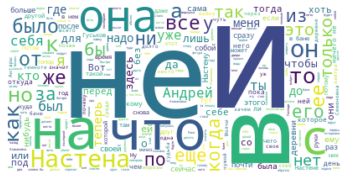

In [21]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
from wordcloud import WordCloud

cloud = WordCloud(background_color="white", max_words=2000)

# generating
cloud.generate(content)

# displaying
plt.imshow(cloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# store to file
cloud.to_file("post_cloud.png")

We can see the most frequent words are "и", "не", "в", "на", "что". But all of them cannot tell us any ideas about this novel. So we'd better use another method to analyze the most frequent words, and extract the key words.
Thus, we need to download a Russian stopwords corpus to avoid the meaningless words.

In [22]:
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk 
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Wanshu\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [23]:
stops = stopwords.words("russian")

tfidf = TfidfVectorizer(
    analyzer="word", # analyze words or symbols (char)
    stop_words=stops # to pass the list of Russian stopwords from NLTK
)

Through the function tfidf we can get a marix of frequences of meaningfull words.

In [24]:
text=[content]
text_tfidf = tfidf.fit_transform(text)
print(f"Matrix of {text_tfidf.shape[0]} documents and {text_tfidf.shape[1]} terms")

Matrix of 1 documents and 2190 terms


You can show part of them.

In [25]:
names = tfidf.get_feature_names()
names[200:220]

C:\Users\Wanshu\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['временем',
 'времени',
 'время',
 'врете',
 'вроде',
 'всей',
 'всему',
 'вскочила',
 'вслух',
 'вспомнив',
 'вспомнить',
 'вставала',
 'встретил',
 'встретились',
 'встреча',
 'встречи',
 'встречу',
 'всюду',
 'вся',
 'всякий']

But we don't need so many of them, we only need to know the key words.

In [26]:
def get_top_tf_idf_words(tfidf_vector, feature_names, top_n):
    sorted_nzs = np.argsort(tfidf_vector.data)[:-(top_n+1):-1]
    return feature_names[tfidf_vector.indices[sorted_nzs]]

In [27]:
feature_names = np.array(tfidf.get_feature_names())
words = get_top_tf_idf_words(text_tfidf, feature_names, 10)
print(words)

['настена' 'это' 'андрей' 'лишь' 'баню' 'деревни' 'сама' 'настену' 'своей'
 'ангары']


Now we get 10 key words. So we can guess this novel is about stories happened between Hастена and Aндрей in a village(деревни). And they might often went to hangars(ангары).
Now we can tokenize the the words in the text.

In [28]:
import spacy

nlp = spacy.load("en_core_web_sm")

In [29]:
d = nlp("Имя Валентина Григорьевича Распутина известно всему миру, его книги переведены на десятки иностранных языков.")
for token in d:
    print(token.text, token.dep_, token.head.text, token.head.pos_,
            [child for child in token.children])

Имя amod Григорьевича PROPN []
Валентина compound Григорьевича PROPN []
Григорьевича compound Распутина PROPN [Имя, Валентина]
Распутина compound известно VERB [Григорьевича]
известно ccomp переведены NOUN [Распутина, миру]
всему compound миру NOUN []
миру dobj известно VERB [всему]
, punct переведены NOUN []
его compound книги NOUN []
книги nsubj переведены NOUN [его]
переведены ROOT переведены NOUN [известно, ,, книги, языков, .]
на nmod языков PROPN []
десятки compound языков PROPN []
иностранных compound языков PROPN []
языков dobj переведены NOUN [на, десятки, иностранных]
. punct переведены NOUN []


Then we can do the syntactic parsing to the aentence in the novel. I picked the first sentence.

In [30]:
from spacy import displacy

In [31]:
d = nlp("Имя Валентина Григорьевича Распутина известно всему миру, его книги переведены на десятки иностранных языков.")

displacy.render(d, style='dep')

Then we can remove the punctuations and lower the words and analyze them.

In [32]:
import re, string

In [33]:
for c in string.punctuation:
    content1 = content.replace(c, "").replace("\xa0",' ')

In [34]:
content2 = content1.lower()

In [35]:
ana = m.analyze(content2)
print(ana[:10])

[{'analysis': [{'lex': 'имя', 'wt': 1, 'gr': 'S,сред,неод=(вин,ед|им,ед)'}], 'text': 'имя'}, {'text': ' '}, {'analysis': [{'lex': 'валентин', 'wt': 0.1003944287, 'gr': 'S,имя,муж,од=(вин,ед|род,ед)'}], 'text': 'валентина'}, {'text': ' '}, {'analysis': [{'lex': 'григорьевич', 'wt': 1, 'gr': 'S,отч,муж,од=(вин,ед|род,ед)'}], 'text': 'григорьевича'}, {'text': ' '}, {'analysis': [{'lex': 'распутин', 'wt': 0.9382723699, 'gr': 'S,фам,муж,од=(вин,ед|род,ед)'}], 'text': 'распутина'}, {'text': ' '}, {'analysis': [{'lex': 'известно', 'wt': 0.03600856486, 'gr': 'ADV,вводн='}], 'text': 'известно'}, {'text': ' '}]


We can extract the values we need fron the result of analysis.

In [36]:
dic={}
for word in ana:
    if 'analysis' in word:
        gr = word['analysis'][0]['gr']
        pos = gr.split('=')[0].split(',')[0]
        lex = word['analysis'][0]['lex']
        wt = word['analysis'][0]['wt']
        cont = word['text']
        if cont in dic:
            dic[cont][4]+=1
        else:
            dic[cont] = ([cont, lex,wt,pos,1])
            
list_content = []
        
for  i in dic:
    list_content.append(dic[i])
list_content = sorted(list_content, key=lambda x:x[4], reverse=True)
for i in list_content:
    print(i)

['и', 'и', 0.9999770357, 'CONJ', 239]
['не', 'не', 1, 'PART', 159]
['в', 'в', 0.9999917878, 'PR', 127]
['на', 'на', 0.9989522965, 'PR', 107]
['что', 'что', 0.688532576, 'CONJ', 92]
['с', 'с', 0.999977831, 'PR', 72]
['она', 'она', 1, 'SPRO', 65]
['настена', 'настена', 1, 'S', 60]
['он', 'он', 1, 'SPRO', 58]
['к', 'к', 0.9999551798, 'PR', 44]
['но', 'но', 0.9998906299, 'CONJ', 39]
['а', 'а', 0.9822148501, 'CONJ', 39]
['как', 'как', 0.6102574114, 'CONJ', 35]
['ее', 'она', 0.9999876545, 'SPRO', 31]
['от', 'от', 1, 'PR', 30]
['же', 'же', 0.9351936974, 'PART', 30]
['все', 'все', 0.1955883233, 'SPRO', 30]
['было', 'быть', 0.975680698, 'V', 29]
['бы', 'бы', 1, 'PART', 26]
['у', 'у', 0.9993940324, 'PR', 25]
['ни', 'ни', 0.5596380099, 'PART', 25]
['его', 'его', 3.284086391e-05, 'APRO', 23]
['еще', 'еще', 0.9209452641, 'ADV', 23]
['из', 'из', 0.9999999775, 'PR', 23]
['за', 'за', 1, 'PR', 21]
['по', 'по', 1, 'PR', 21]
['я', 'я', 0.9999716281, 'SPRO', 21]
['так', 'так', 0.9840554802, 'ADVPRO', 20]


I coppied the values into a csv file named 'zhivi_words.csv'.

In [37]:
import sqlite3
import csv
with open('zhivi_words.csv', 'r', encoding='utf-8') as f:
    f = f.readlines()
    
conn = sqlite3.connect('zhivi_words.db')
c = conn.cursor()

c.execute("DROP TABLE IF EXISTS count_text")
c.execute("CREATE TABLE IF NOT EXISTS count_text(content,count)")

c.execute("DROP TABLE IF EXISTS PoS_text")
c.execute("CREATE TABLE IF NOT EXISTS PoS_text(content,lex,PoS)")

c.execute("DROP TABLE IF EXISTS weight_text")
c.execute("CREATE TABLE IF NOT EXISTS weight_text(content,wt)")

for cont in dic:
    row = dic[cont]
    print(row)
    c.execute("INSERT INTO count_text VALUES (?,?)", (row[0],row[4]))
    c.execute("INSERT INTO PoS_text VALUES (?,?,?)", (row[0],row[1],row[3]))
    c.execute("INSERT INTO weight_text VALUES (?,?)", (row[0],row[2]))
    
conn.commit()
for i in c.execute("SELECT * FROM count_text"):
    print(i)
for i in c.execute("SELECT * FROM PoS_text"):
    print(i)
for i in c.execute("SELECT * FROM weight_text"):
    print(i)

conn.close()

['имя', 'имя', 1, 'S', 1]
['валентина', 'валентин', 0.1003944287, 'S', 2]
['григорьевича', 'григорьевич', 1, 'S', 1]
['распутина', 'распутин', 0.9382723699, 'S', 2]
['известно', 'известно', 0.03600856486, 'ADV', 1]
['всему', 'весь', 0.5154419261, 'APRO', 1]
['миру', 'мир', 0.9805195877, 'S', 1]
['его', 'его', 3.284086391e-05, 'APRO', 23]
['книги', 'книга', 1, 'S', 1]
['переведены', 'переводить', 0.1801296314, 'V', 1]
['на', 'на', 0.9989522965, 'PR', 107]
['десятки', 'десяток', 0.7864435919, 'S', 2]
['иностранных', 'иностранный', 1, 'A', 1]
['языков', 'язык', 0.9811160565, 'S', 1]
['трагизм', 'трагизм', 1, 'S', 1]
['и', 'и', 0.9999770357, 'CONJ', 239]
['горькая', 'горький', 0.9967350366, 'A', 1]
['правда', 'правда', 0.8374588342, 'ADV', 4]
['произведений', 'произведение', 1, 'S', 1]
['поразили', 'поражать', 1, 'V', 1]
['читателей', 'читатель', 1, 'S', 1]
['недаром', 'недаром', 1, 'ADV', 1]
['повести', 'повесть', 0.9983443175, 'S', 1]
['рассказы', 'рассказ', 1, 'S', 1]
['экранизированы',

('самой', 2)
('ближней', 1)
('своей', 8)
('стороне', 1)
('карды', 4)
('располагался', 1)
('сельсовет', 2)
('которому', 2)
('приписана', 1)
('насчитывалось', 1)
('двадцати', 1)
('верст', 1)
('рыбной', 2)
('другом', 2)
('рыбная', 1)
('держалась', 2)
('своих', 2)
('нижних', 1)
('соседей', 1)
('там', 6)
('магазины', 1)
('начальство', 1)
('ту', 1)
('сторону', 2)
('район', 1)
('шли', 3)
('всякой', 1)
('нуждой', 1)
('атамановку', 4)
('заплывали', 1)
('редко', 1)
('мимо', 5)
('шлепали', 1)
('пароходы', 1)
('провозили', 1)
('новости', 1)
('многое', 2)
('проходило', 1)
('нее', 4)
('маячившей', 1)
('тускло', 1)
('сиротливо', 1)
('даже', 6)
('войне', 3)
('узнали', 1)
('судьба', 5)
('вечно', 1)
('незаметной', 1)
('получила', 1)
('другого', 2)
('более', 2)
('громкого', 1)
('пугающего', 1)
('разбойниково', 2)
('годы', 4)
('здешние', 1)
('мужички', 1)
('брезговали', 1)
('одним', 4)
('тихим', 1)
('прибыльным', 1)
('промыслом', 1)
('проверяли', 1)
('идущих', 1)
('лены', 1)
('золотишников', 1)
('стоит', 

('осталось', 'оставаться', 'V')
('прежнее', 'прежний', 'A')
('ты', 'ты', 'SPRO')
('взялся', 'взяться', 'V')
('оттуда', 'оттуда', 'ADVPRO')
('говорила', 'говорить', 'V')
('никому', 'никто', 'SPRO')
('лица', 'лицо', 'S')
('рассмотреть', 'рассматривать', 'V')
('большое', 'большой', 'A')
('лохматое', 'лохматый', 'A')
('смутно', 'смутно', 'ADV')
('чернело', 'чернеть', 'V')
('слабом', 'слабый', 'A')
('мерцании', 'мерцание', 'S')
('источало', 'источать', 'V')
('углах', 'угол', 'S')
('задернутое', 'задернуть', 'V')
('оконце', 'оконце', 'S')
('дышал', 'дышать', 'V')
('шумно', 'шумно', 'ADV')
('часто', 'часто', 'ADV')
('натягивая', 'натягивать', 'V')
('грудь', 'грудь', 'S')
('тяжелого', 'тяжелый', 'A')
('бега', 'бег', 'S')
('почувствовала', 'почувствовать', 'V')
('задыхается', 'задыхаться', 'V')
('настолько', 'настолько', 'ADV')
('неожиданно', 'неожиданно', 'ADV')
('встреча', 'встреча', 'S')
('воровской', 'воровской', 'A')
('жуткой', 'жуткий', 'A')
('минут', 'минута', 'S')
('слов', 'слово', 'S')

('уберегся', 1)
('попав', 0.984253742)
('бомбежку', 1)
('контужен', 0.5876993337)
('взрывной', 0.6963492825)
('волной', 1)
('начисто', 1)
('отбило', 1)
('слух', 1)
('слышал', 1)
('звуки', 1)
('вернулись', 1)


Now I created a database with three tables which with the key "content". Then we can creat a dataframe from the database.

In [38]:
import sqlite3
import pandas as pd

#con = sqlite3.connect('zhivi_words.db')
#cursor = con.cursor()
with sqlite3.connect('zhivi_words.db') as con:
    c = con.cursor()
packs = pd.read_sql("""
SELECT count, count_text.content, lex, PoS, wt
FROM count_text
    JOIN PoS_text ON PoS_text.content = count_text.content
    JOIN weight_text ON weight_text.content = count_text.content""", con = con)
#sql ="SELECT * FROM packs"
#values = cursor.execute(sql)
#packs = pd.DataFrame(data = values)

print(packs.shape)
print(packs.dtypes)
print(packs.head())

(2350, 5)
count        int64
content     object
lex         object
PoS         object
wt         float64
dtype: object
   count       content          lex  PoS        wt
0      1           имя          имя    S  1.000000
1      2     валентина     валентин    S  0.100394
2      1  григорьевича  григорьевич    S  1.000000
3      2     распутина     распутин    S  0.938272
4      1      известно     известно  ADV  0.036009


In [39]:
packs.shape, packs.dropna().shape # the shape of the dataframe: rows, columns

((2350, 5), (2350, 5))

We can select some columns or filter out some rows with specific conditions.

In [40]:
df = packs[["content", "PoS", "wt"]]

In [41]:
df.head()

,content,PoS,wt
0,имя,S,1.000000
1,валентина,S,0.100394
2,григорьевича,S,1.000000
3,распутина,S,0.938272
4,известно,ADV,0.036009


In [42]:
packs[packs["count"] > 10]

,count,content,lex,PoS,wt
7,23,его,его,APRO,0.000033
10,107,на,на,PR,0.998952
15,239,и,и,CONJ,0.999977
39,127,в,в,PR,0.999992
57,39,но,но,CONJ,0.999891
63,35,как,как,CONJ,0.610257
66,21,за,за,PR,1.000000
70,72,с,с,PR,0.999978
77,21,по,по,PR,1.000000
85,29,было,быть,V,0.975681


As we can see, we found the values which the words show more than 10 times in the novel. 
We can also do some calculations.

In [43]:
packs["PoS"].value_counts()

V         890
S         701
A         271
ADV       191
APRO       95
SPRO       57
PR         40
ADVPRO     31
PART       25
CONJ       18
NUM        15
ANUM       14
INTJ        2
Name: PoS, dtype: int64

As we can see, the verbs are more than others, the noun is the second biggest group, adjective is the third. For a novel which describes storis, this situation is quite normal.

In [44]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import random
random.seed = 23

Text(0, 0.5, 'Number of words')

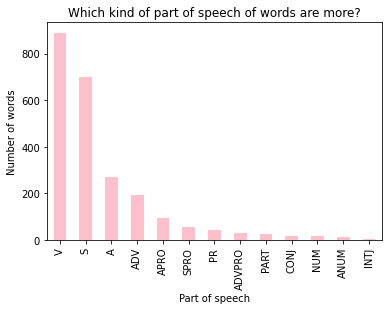

In [45]:
packs["PoS"].value_counts().plot.bar(color='pink');
plt.title('Which kind of part of speech of words are more?')
plt.xlabel('Part of speech')
plt.ylabel('Number of words')

From this plot, we can know the verbs, nouns, adjectives, and adverbs are more than other words in the novel.
We can also show them by using a pie plot, which can show the proportion.

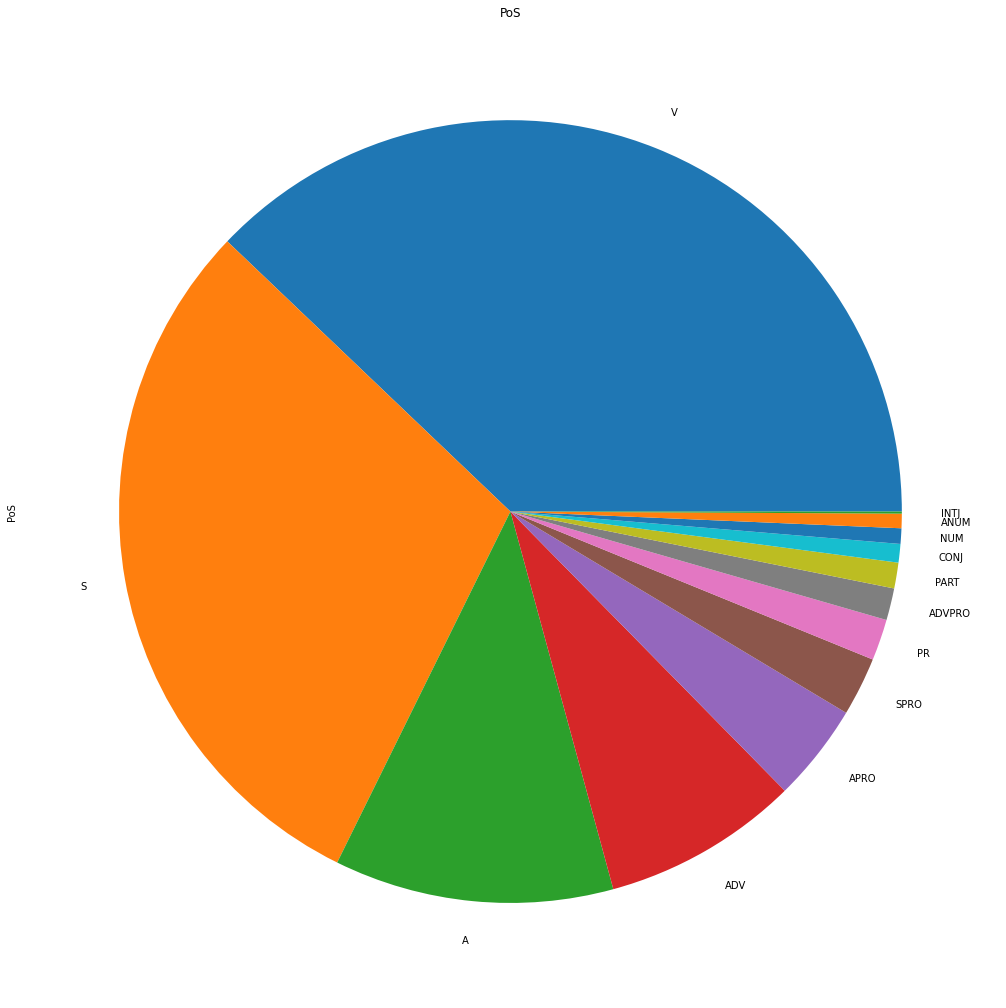

In [46]:
plt.figure(figsize=(18, 18))
packs['PoS'].value_counts().plot(kind='pie');
plt.title('PoS');

We can count the mean values of weight of each kind of part of speech and show them in a bar plot.

In [47]:
packs.groupby("PoS").agg({"wt": "mean"})

,wt
PoS,
A,0.941866
ADV,0.873561
ADVPRO,0.996502
ANUM,0.993304
APRO,0.918710
CONJ,0.821122
INTJ,0.999865
NUM,0.942110
PART,0.794591


Text(0, 0.5, 'Mean of weight')

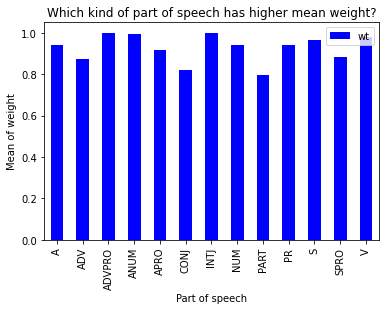

In [48]:
packs.groupby("PoS").agg({"wt": "mean"}).plot.bar(color='blue');
plt.title('Which kind of part of speech has higher mean weight?')
plt.xlabel('Part of speech')
plt.ylabel('Mean of weight')

We can also show them by using a box plot.

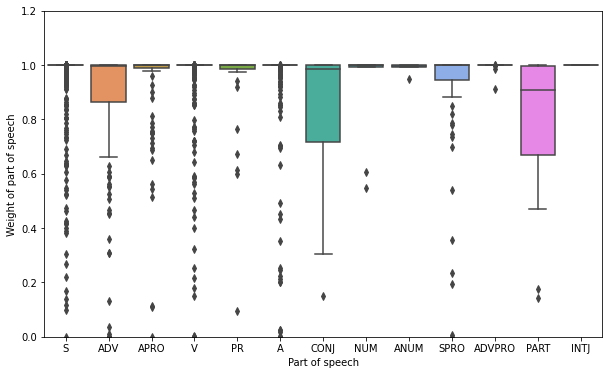

In [49]:
plt.figure(figsize=(10, 6))
sns.boxplot(x="PoS", y="wt", data=packs)
plt.ylim((0, 1.2))
#plt.title('Variation in length during different Disney eras')
plt.ylabel('Weight of part of speech')
plt.xlabel('Part of speech');

Using plotly can aslo get the same boxplot.

In [50]:
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly as py
import plotly.graph_objs as go

init_notebook_mode(connected=True)

In [51]:
data = []
for PoS in packs.PoS.unique():
    data.append(
        go.Box(y=packs[packs["PoS"]==PoS].wt, name=PoS)
    )

iplot(data, show_link = False)
py.offline.plot(data,filename="Weight.html")

'Weight.html'

You can find the png and html file in this folder.

From the above three plots, we can know that the weight values of the NUM, ANUM, ADVPRO, and INTJ are more concentrate, which means they are not likely to change word form in this novel. But the S, V, and A have more discrete weight values, which means they are more likely to change word form in this novel.
We can group the values by part of speech, and list all the words of each part of speech.

In [52]:
packs.groupby(["PoS"], sort=False).agg({"content": set})

,content
PoS,
S,"{сирота, утешения, субботу, дороге, каменку, ш..."
ADV,"{больше, точно, наскоро, беда, легонько, скоро..."
APRO,"{самое, какая-то, самого, своей, такие, тех, к..."
V,"{оставалась, принести, успеет, занавесила, цел..."
PR,"{против, у, до, изо, с, без, к, на, близ, в, ч..."
A,"{обратной, тощая, ломком, ясней, местных, звер..."
CONJ,"{или, да, как, что, и, когда, то, впрочем, есл..."
NUM,"{сорок, три, пять, трех, пяти, столько, два, д..."
ANUM,"{третьего, третьем, первого, первых, четвертог..."


In [53]:
packs.groupby(["lex"], sort=False).agg({"content": set})

,content
lex,
имя,{имя}
валентин,{валентина}
григорьевич,{григорьевича}
распутин,{распутина}
известно,{известно}
...,...
контузить,{контужен}
взрывной,{взрывной}
волна,{волной}


From this dataframe we know there are 1664 lemmas in the text.
We can count the lenth of the worrds and add the values to the dataframe as a new column.

In [54]:
def length(content):
    if type(content) == str:
        text = [len(content) for word in content]
    return len(content)

In [55]:
df2 = packs.copy()
df2["len"] = df2["content"].apply(length)
df2.head()

,count,content,lex,PoS,wt,len
0,1,имя,имя,S,1.000000,3
1,2,валентина,валентин,S,0.100394,9
2,1,григорьевича,григорьевич,S,1.000000,12
3,2,распутина,распутин,S,0.938272,9
4,1,известно,известно,ADV,0.036009,8


We can add the length of words into the previous plot "Which kind of part of speech of words are more?" to creat a new one.

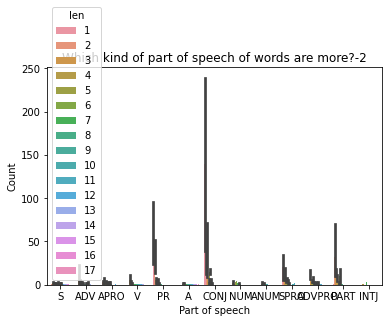

In [56]:
sns.barplot(x="PoS", y="count", hue='len', data=df2)
plt.title('Which kind of part of speech of words are more?-2')
plt.xlabel('Part of speech')
plt.ylabel('Count');

As we can see, the plot is so small to see all details. To get a more clear view of the high frequent words, we can filter out the words more than 10 in the novel to creat a bar plot.

In [57]:
df3 = df2[df2['count']>10]
df3.head()

,count,content,lex,PoS,wt,len
7,23,его,его,APRO,0.000033,3
10,107,на,на,PR,0.998952,2
15,239,и,и,CONJ,0.999977,1
39,127,в,в,PR,0.999992,1
57,39,но,но,CONJ,0.999891,2


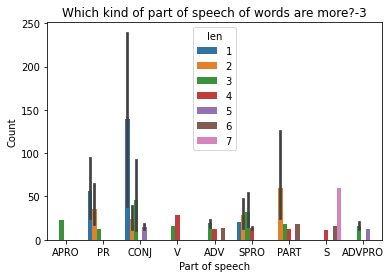

In [58]:
df3 = sns.barplot(x="PoS", y="count", hue='len', data=df3)
plt.title('Which kind of part of speech of words are more?-3')
plt.xlabel('Part of speech')
plt.ylabel('Count');

From this plot, we can know that the one character PR and CONJ and 2 characters PART are more than other words in this novel.
And we can also test the cross-correlation of lenth, count, and weight of words.

In [59]:
df4=df2[["len","count","wt"]]
df4.head()

,len,count,wt
0,3,1,1.000000
1,9,2,0.100394
2,12,1,1.000000
3,9,2,0.938272
4,8,1,0.036009


<AxesSubplot:>

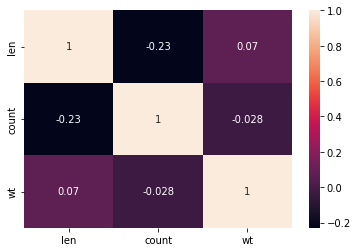

In [60]:
sns.heatmap(df4.corr(), annot=True)

From this plot we can know the length of words are more correlated with weight of words than with count of words in this novel.

In conclusion, «Живи и помни» is a Russian novel which describes the stories happened in a villige, the main characters in this novel are Hастена and Aндрей. Because except stopwords such as "и", "не", "в", "на", "что", the key words are 'настена' 'это' 'андрей' 'лишь' 'баню' 'деревни' 'сама' 'настену' 'своей' 'ангары'.

It has 2350 non-repeated words, 1664 lemmas.

The verbs, nouns, adjectives, and adverbs are more than other words, the one character PR and CONJ and 2 characters PART are more than other words, the weight values of the NUM, ANUM, ADVPRO, and INTJ are more concentrate, which means they are not likely to change word form in this novel. But the S, V, and A have more discrete weight values, which means they are more likely to change word form, the length of words are more correlated with weight of words than with count of words.